In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import keras
import os
from tqdm import tqdm
import json
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_json = 'train.json'
test_json = 'test.json'
images_path = 'agri_data/data/'

In [3]:
with open(train_json,'r') as train:
    train_data = json.load(train)

In [4]:
with open(test_json,'r') as test:
    test_data = json.load(test)

In [5]:
train_images_list = list(train_data.keys())
test_images_list =list(test_data.keys())

# Creating folders

In [6]:
os.mkdir('Train')
os.mkdir('Test')

In [7]:
os.mkdir('Train/weed')
os.mkdir('Train/crop')
os.mkdir('Train/background')

os.mkdir('Test/weed')
os.mkdir('Test/crop')
os.mkdir('Test/background')

# Generating images

In [8]:
#For Training
for count,img_id in tqdm(enumerate(train_images_list)):
    img = cv2.imread(images_path + img_id)
    
    
    for proposal in train_data[img_id]['region_proposal']:
        x,y,w,h = proposal[0]
        label   = proposal[1]
         
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        
        cv2.imwrite('Train/'+label+'/'+ label+'_'+ str(len(os.listdir('Train/'+label))) +'.jpeg',temp_img)
        
    
    for background in train_data[img_id]['negative_example']:
        x,y,w,h = background
        label = 'background'
        
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        
        cv2.imwrite('Train/'+label+'/'+ label+'_'+ str(len(os.listdir('Train/'+label))) + '.jpeg',temp_img)

1000it [33:22,  2.00s/it]


In [9]:
#For Testing
for count,img_id in tqdm(enumerate(test_images_list)):
    img = cv2.imread(images_path + img_id)
    
    
    for proposal in test_data[img_id]['region_proposal']:
        x,y,w,h = proposal[0]
        label   = proposal[1]
         
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        
        cv2.imwrite('Test/'+label+'/'+ label+'_'+ str(len(os.listdir('Test/'+label))) +'.jpeg',temp_img)
        
    
    for background in test_data[img_id]['negative_example']:
        x,y,w,h = background
        label = 'background'
        
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        
        cv2.imwrite('Test/'+label+'/'+ label+'_'+ str(len(os.listdir('Test/'+label))) + '.jpeg',temp_img)


300it [03:52,  1.29it/s]


In [10]:
print('Total training weed images are {}'.format(len(os.listdir('Train/weed'))))
print('Total training crop images are {}'.format(len(os.listdir('Train/crop'))))
print('Total training background images are {}'.format(len(os.listdir('Train/background'))))

Total training weed images are 7721
Total training crop images are 10298
Total training background images are 35350


In [11]:
print('Total testing weed images are {}'.format(len(os.listdir('Test/weed'))))
print('Total testing crop images are {}'.format(len(os.listdir('Test/crop'))))
print('Total testing background images are {}'.format(len(os.listdir('Test/background'))))

Total testing weed images are 2331
Total testing crop images are 3147
Total testing background images are 10769


# Visualizing Images

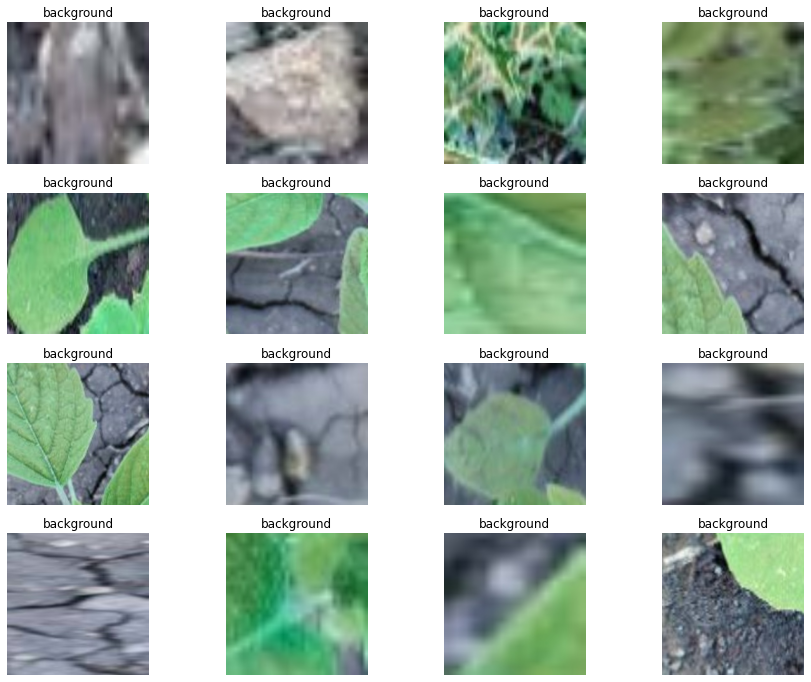

In [12]:
plt.figure(figsize=(15,12))
for i,img in enumerate(os.listdir('Train/background')[:16]):
    plt.subplot(4,4,i+1)
    plt.title('background')
    img = cv2.imread('Train/background/'+img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')

plt.show()  

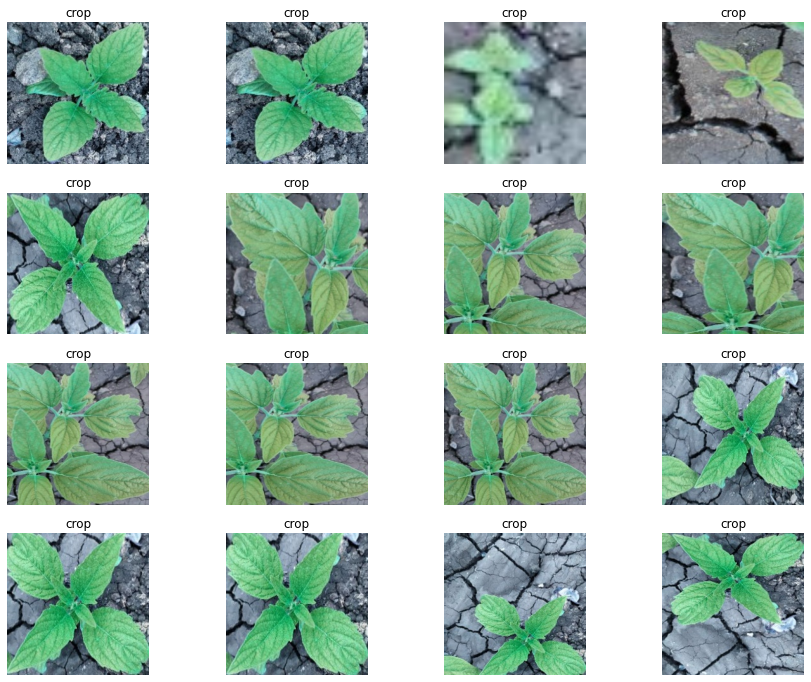

In [13]:
plt.figure(figsize=(15,12))
for i,img in enumerate(os.listdir('Train/crop')[0:16]):
    plt.subplot(4,4,i+1)
    plt.title('crop')
    img = cv2.imread('Train/crop/'+img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')

plt.show()

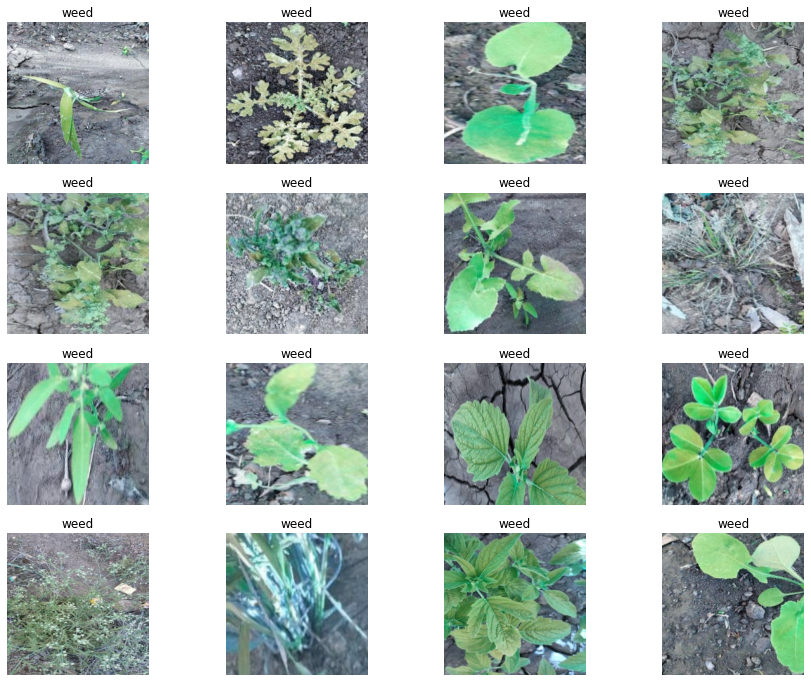

In [14]:
plt.figure(figsize=(15,12))

for i,img in enumerate(os.listdir('Train/weed')[0:16]):
    plt.subplot(4,4,i+1)
    plt.title('weed')
    img = cv2.imread('Train/weed/'+img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
plt.show()    